# WELCOME TO THE NOTEBOOK

Importing modules

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statistics as stat
import numpy as np
import seaborn as sns
from collections import Counter

Loading the Dataset 

In [6]:
file_path = "./facebook.txt"
with open(file_path) as file:
  data = file.read()

Task 2: Let's create the edges list

In [7]:
edges = []
for line in data.split("\n"):
  nodes = line.split(" ")
  edge = (int(nodes[0]), int(nodes[1]))
  edges.append(edge)

Creating the graph

In [8]:
G = nx.Graph(edges)

Let's Visualize the graph

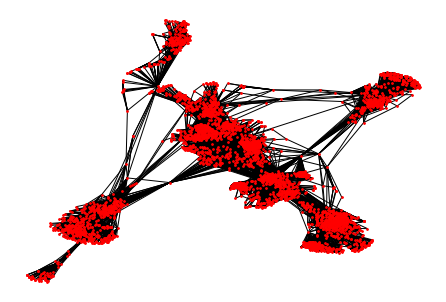

In [9]:
layout = nx.spring_layout(G)
nx.draw(G, pos=layout, node_size=3, node_color="red")

Task 3: Let's calculate some important properties of this graph

- Size of the graph
- Number of nodes 
- Average degree 
- Average shortest path

Size of the graph

In [17]:
size_of_graph = len(edges)
size_of_graph

88234

Number of nodes

In [18]:
nodes_number = G.number_of_nodes()
nodes_number

4039

Average shortest path

In [16]:
L = nx.average_shortest_path_length(G)
L

3.6925068496963913

Average degree

let's get list of the degrees

In [21]:
degrees = [G.degree(n) for n in G.nodes()]

In [22]:
avg_degree = stat.mean(degrees)
avg_degree

43.69101262688784

Task 4: let's find out 3 most important nodes of the graph and visualize them

- Calculating the degree centrality of each node 
- Calculating the load centrality of each node 


Calculating the degree centrality

In [39]:
degree_cnt = nx.degree_centrality(G)
dict_items = degree_cnt.items()
dict_items_sorted = sorted(dict_items, key = lambda item: item[1], reverse=True)
degree_cnt_sorted = {k:v for k,v in dict_items_sorted}
most_important_nodes = list(degree_cnt_sorted)[:3]
most_important_nodes

[107, 1684, 1912]

Visualizing the important nodes on the graph - using degree centrality

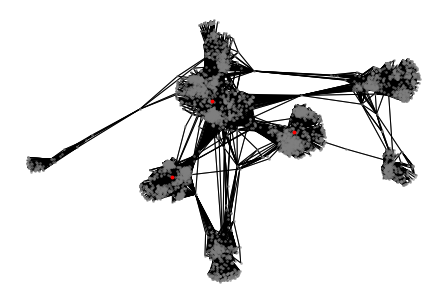

In [36]:
nx.draw(G, pos=layout, node_size=3, node_color="grey", alpha=0.5)
nx.draw(G, pos=layout, nodelist = most_important_nodes, node_size=8, node_color="red", alpha=1)

Calculating the load centrality

In [40]:
load_cnt = nx.load_centrality(G)

dict_items = load_cnt.items()
dict_items_sorted = sorted(dict_items, key = lambda item: item[1], reverse=True)
load_cnt_sorted = {k:v for k,v in dict_items_sorted}
most_important_nodes = list(load_cnt_sorted)[:3]
most_important_nodes

[107, 1684, 3437]

Visualizing the important nodes on the graph - using load centrality

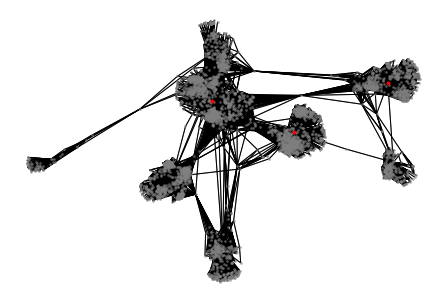

In [41]:
nx.draw(G, pos=layout, node_size=3, node_color="grey", alpha=0.5)
nx.draw(G, pos=layout, nodelist = most_important_nodes, node_size=8, node_color="red", alpha=1)

Task 5: Is it a Scale-free graph? 

Let's take a look at the degree distribution

Getting the degree frequencies

In [46]:
degrees_counter = Counter(degrees)
degrees, degrees_frequency = zip(*degrees_counter.items())

let's plot the degree distribution

Text(0, 0.5, 'count')

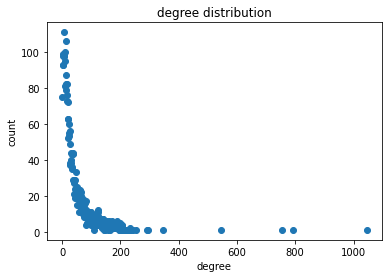

In [48]:
plt.scatter(degrees, degrees_frequency)
plt.title("degree distribution")
plt.xlabel("degree")
plt.ylabel("count")

Another proof of this graph being a Scale-free Graph

In Scale-free networks "Richs are getting Richer!"

In [49]:
size_of_graph

88234

In [51]:
final_step = int(size_of_graph/100)*100
final_step

88200

In [53]:
size = []
max_k = []
for i in list(range(100, final_step, 100)):
  this_step_edges = edges[:i]
  this_step_graph = nx.Graph(this_step_edges)
  degs = [this_step_graph.degree(n) for n in this_step_graph.nodes()]
  max_deg = max(degs)
  graph_size = this_step_graph.number_of_nodes()
  size.append(graph_size)
  max_k.append(max_deg)

let's plot

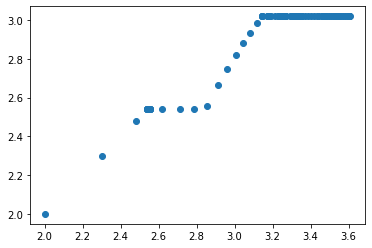

In [54]:
plt.scatter(np.log10(size), np.log10(max_k))